In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib

In [3]:
df = pd.read_csv("dataset_kurma.csv")
df

,berat,kadar_gula,warna,tekstur,tingkat_kematangan,jenis
0,14,75,kecoklatan,kasar,setengah matang,medjool
1,14,77,kecoklatan,kasar,setengah matang,ajwa
2,12,60,kehitaman,halus,terlalu matang,ajwa
3,17,82,kecoklatan,kasar,terlalu matang,medjool
4,9,73,kehitaman,agak kasar,matang,ajwa
...,...,...,...,...,...,...
495,16,74,kecoklatan,halus,setengah matang,sukkari
496,16,77,kecoklatan,agak kasar,matang,sukkari
497,16,88,kecoklatan,kasar,matang,medjool
498,11,68,kehitaman,agak kasar,matang,ajwa


In [9]:
df.shape

(500, 6)

In [8]:
# Menampilkan kolom pada dataset
df.columns

Index(['berat', 'kadar_gula', 'warna', 'tekstur', 'tingkat_kematangan',
       'jenis'],
      dtype='object')

In [7]:
# Menampilkan kolom dan jenis datanya
df.dtypes

berat                  int64
kadar_gula             int64
warna                 object
tekstur               object
tingkat_kematangan    object
jenis                 object
dtype: object

In [13]:
df["tekstur"].value_counts()

tekstur
agak kasar    268
halus         149
kasar          83
Name: count, dtype: int64

In [10]:
df["tingkat_kematangan"].value_counts()

tingkat_kematangan
terlalu matang     186
setengah matang    160
matang             154
Name: count, dtype: int64

In [12]:
df["jenis"].value_counts()

jenis
sukkari    198
medjool    156
ajwa       146
Name: count, dtype: int64

In [14]:
df.describe()

,berat,kadar_gula
count,500.000000,500.000000
mean,13.316000,76.378000
std,3.252276,7.717917
min,8.000000,60.000000
25%,11.000000,71.000000
50%,13.000000,77.000000
75%,16.000000,83.000000
max,20.000000,90.000000


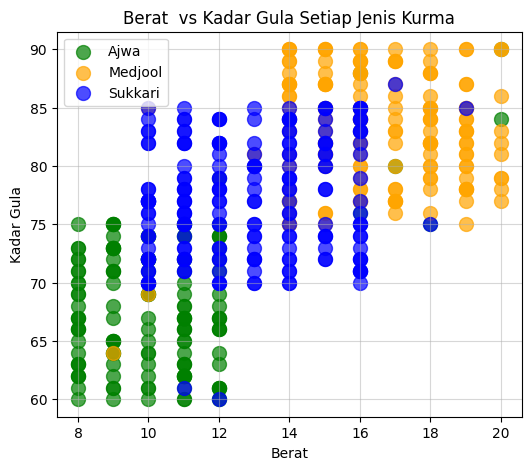

In [35]:
ajwa = df[df["jenis"]=="ajwa"]
medjool = df[df["jenis"]=="medjool"]
sukkari = df[df["jenis"]=="sukkari"]
# Usahakan tidak tampil eror

# Jika ingin tampilkan ketik saja salah satu nama

plt.figure(figsize=(6,5))

plt.scatter(ajwa["berat"], ajwa["kadar_gula"],
           s=100, color="green", alpha=0.7, label="Ajwa")
plt.scatter(medjool["berat"], medjool["kadar_gula"],
            s=100, color="orange", alpha=0.7, label="Medjool")
plt.scatter(sukkari["berat"], sukkari["kadar_gula"],
            s=100, color="blue", alpha=0.7, label="Sukkari")

plt.xlabel("Berat")
plt.ylabel("Kadar Gula")
plt.title("Berat  vs Kadar Gula Setiap Jenis Kurma")
plt.legend()
plt.grid(True, linestyle="-", alpha=0.5)
plt.xticks(rotation=0)
plt.show()

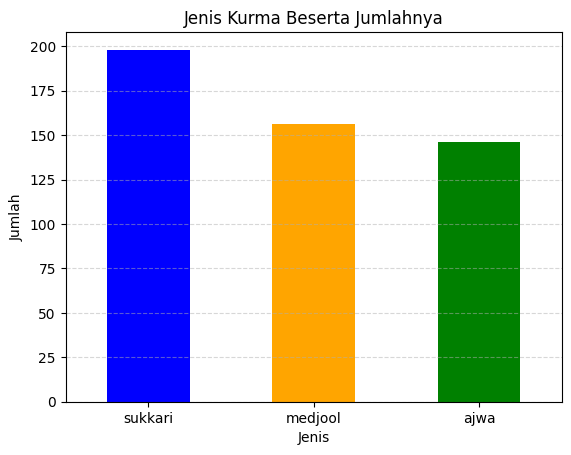

In [39]:
counts = df["jenis"].value_counts()
counts.plot(kind="bar", color=["blue","orange","green"])

plt.xlabel("Jenis")
plt.ylabel("Jumlah")
plt.title("Jenis Kurma Beserta Jumlahnya")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.xticks(rotation=0)
# plt.yticks(rotation=0)
plt.show()

In [50]:
# Mempersiapkan Data untuk Machine Learning
X = df[["berat", "kadar_gula", "warna", "tekstur", "tingkat_kematangan"]]
y = df["jenis"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_columns = ["berat", "kadar_gula"]
categorical_columns = ["warna"]
ordinal_columns = ["tekstur", "tingkat_kematangan"]

tekstur_order = ["halus", "agak kasar", "kasar"]
tingkat_kematangan_order = ["setengah matang", "matang", "terlalu matang"]

ordinal_order = [tekstur_order, tingkat_kematangan_order]

preprocessing = ColumnTransformer(
    transformers=[
        ("scaler", StandardScaler(), numeric_columns),
        ("ohe", OneHotEncoder(), categorical_columns),
        ("oe", OrdinalEncoder(categories=ordinal_order),ordinal_columns)
])

model = Pipeline(
    steps=[
        ("preprocessing", preprocessing),
        ("model", LogisticRegression()),
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))

print("\nClassification Report :\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Accuracy : 0.94

Classification Report :
               precision    recall  f1-score   support

        ajwa       1.00      0.91      0.95        22
     medjool       0.90      0.95      0.93        39
     sukkari       0.95      0.95      0.95        39

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix :
 [[20  2  0]
 [ 0 37  2]
 [ 0  2 37]]


In [53]:
scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
print("SCores :", scores)
print("\nMean Accuracy :", scores.mean())
print("")

SCores : [0.87 0.9  0.93 0.92 0.94]

Mean Accuracy : 0.9120000000000001



In [60]:
param_grid = {
    "model__C" : [0.01, 0.1, 1, 10, 100], 
    "model__penalty" : ["l2"], # berarti jika model penalty ini ada lagi bisa atau tidak?
    "model__solver" : ["lbfgs", "saga"]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

print("Best Paramaters :", grid_search.best_params_)
print("Best Score :", grid_search.best_score_)
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report :\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix :\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Paramaters : {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best Score : 0.915
Accuracy : 0.94

Classification Report :
               precision    recall  f1-score   support

        ajwa       1.00      0.91      0.95        22
     medjool       0.90      0.95      0.93        39
     sukkari       0.95      0.95      0.95        39

    accuracy                           0.94       100
   macro avg       0.95      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix :
 [[20  2  0]
 [ 0 37  2]
 [ 0  2 37]]


In [63]:
joblib.dump(best_model, "best_model.joblib")
model_tersimpan = joblib.load("best_model.joblib")

data_baru = pd.DataFrame([[13,65,"kecoklatan","kasar","setengah matang"]], columns=["berat","kadar_gula", "warna","tekstur","tingkat_kematangan"])
prediksi = model_tersimpan.predict(data_baru)[0]
presentase = max(model_tersimpan.predict_proba(data_baru)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi sukkari dengan tingkat keyakinan 50.64%


In [65]:
data_baru = pd.DataFrame([[13,65,"kehitaman","kasar","setengah matang"]], columns=["berat","kadar_gula","warna","tekstur","tingkat_kematangan"])
prediksi = model_tersimpan.predict(data_baru)[0]
presentase = max(model_tersimpan.predict_proba(data_baru)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi ajwa dengan tingkat keyakinan 89.72%


In [67]:
data_baru = pd.DataFrame([[18,95, "kehitaman","kasar","matang"]], columns=["berat","kadar_gula","warna","tekstur","tingkat_kematangan"])
prediksi = model_tersimpan.predict(data_baru)[0]
presentase = max(model_tersimpan.predict_proba(data_baru)[0])
print(f"Model memprediksi {prediksi} dengan tingkat keyakinan {presentase*100:.2f}%")

Model memprediksi medjool dengan tingkat keyakinan 98.49%
